##목차
1. 데이터 및 결측치 확인
2. 지역에 따라서 선호하는 게임 장르가 있을까?
3. 연도별 게임의 트렌드가 있을까?
4. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스?
5. Conclusion

# 1. 데이터 및 결측치 확인

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')
print(df.shape)
df.head()

(16598, 10)


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
# Categorical Data인 Platform과 Genre 칼럼의 유니크한 값 확인
print('플랫폼 종류\n', df['Platform'].unique())
print('장르\n', df['Genre'].unique())

플랫폼 종류
 ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
장르
 ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']


In [8]:
# 출고량 데이터 통일 함수
def value_to_million(x):
  if 'M' in x:
    return float(x.replace('M', ''))
  elif 'K' in x:
    return float(x.replace('K', '')) * 0.001
  else:
    return float(x)

In [11]:
# 연도 통일 함수
def year_to_four_nums(x):
  if (x < 100) & (x >= 21):
    return int(x + 1900)
  elif x < 21:
    return int(x + 2000)
  else:
    return int(x)

In [9]:
df['NA_Sales'] = df['NA_Sales'].apply(value_to_million)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_million)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_million)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_million)

In [12]:
df['Year'] = df['Year'].apply(year_to_four_nums)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [14]:
# 총 출고량 column 
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [15]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


#2. 지역에 따라서 선호하는 게임 장르가 있을까?





In [16]:
df_by_genre = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].groupby(df['Genre']).sum()
df_by_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


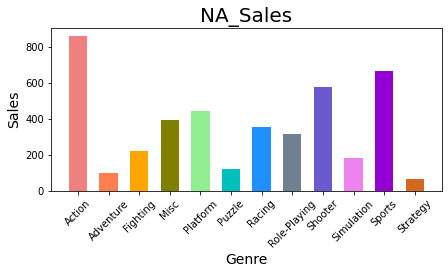

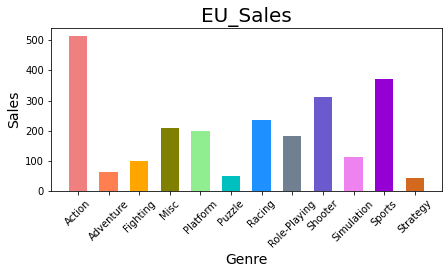

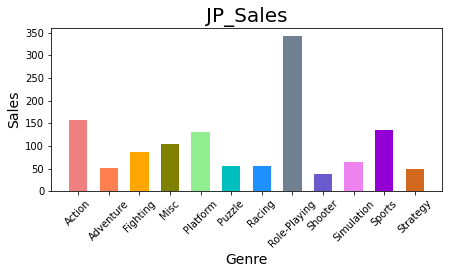

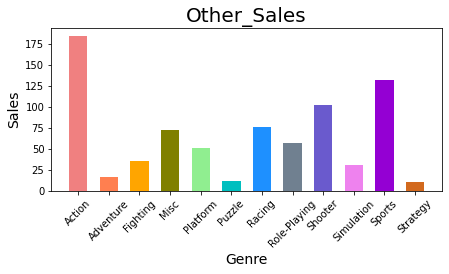

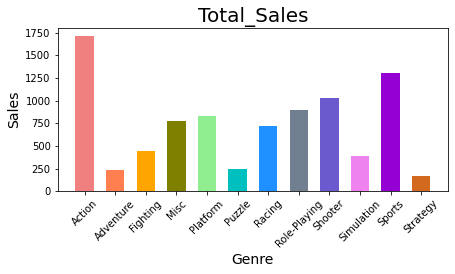

In [17]:
import matplotlib.pyplot as plt

colors = ['lightcoral', 'coral', 'orange', 'olive', 'lightgreen', 'c', 'dodgerblue', 'slategray', 'slateblue', 'violet', 'darkviolet', 'chocolate']

# Genre 별 NA_Sales
plt.figure(figsize=(7,3))
plt.bar(df_by_genre.index, df_by_genre['NA_Sales'], width=0.6, color=colors)
plt.title('NA_Sales', fontdict={'size':20})
plt.xlabel('Genre', fontdict={'size':14})
plt.ylabel('Sales', fontdict={'size':14})
plt.xticks(df_by_genre.index, rotation=45)
plt.show()

# Genre 별 EU_Sales
plt.figure(figsize=(7,3))
plt.bar(df_by_genre.index, df_by_genre['EU_Sales'], width=0.6, color=colors)
plt.title('EU_Sales', fontdict={'size':20})
plt.xlabel('Genre', fontdict={'size':14})
plt.ylabel('Sales', fontdict={'size':14})
plt.xticks(df_by_genre.index, rotation=45)
plt.show()

# Genre 별 JP_Sales
plt.figure(figsize=(7,3))
plt.bar(df_by_genre.index, df_by_genre['JP_Sales'], width=0.6, color=colors)
plt.title('JP_Sales', fontdict={'size':20})
plt.xlabel('Genre', fontdict={'size':14})
plt.ylabel('Sales', fontdict={'size':14})
plt.xticks(df_by_genre.index, rotation=45)
plt.show()

# Genre 별 Other_Sales
plt.figure(figsize=(7,3))
plt.bar(df_by_genre.index, df_by_genre['Other_Sales'], width=0.6, color=colors)
plt.title('Other_Sales', fontdict={'size':20})
plt.xlabel('Genre', fontdict={'size':14})
plt.ylabel('Sales', fontdict={'size':14})
plt.xticks(df_by_genre.index, rotation=45)
plt.show()

# Genre 별 Total_Sales
plt.figure(figsize=(7,3))
plt.bar(df_by_genre.index, df_by_genre['Total_Sales'], width=0.6, color=colors)
plt.title('Total_Sales', fontdict={'size':20})
plt.xlabel('Genre', fontdict={'size':14})
plt.ylabel('Sales', fontdict={'size':14})
plt.xticks(df_by_genre.index, rotation=45)
plt.show()

북미 지역 게임 매출 1위, 2위, 3위 장르 : Action, Sports, Shooter

유럽 지역 게임 매출 1위, 2위, 3위 장르 : Action, Sports, Shooter

일본 지역 게임 매출 1위, 2위, 3위 장르 : Role-Playing, Action, Sports

기타 지역 게임 매출 1위, 2위, 3위 장르 : Action, Sports, Shooter

전 셰계적으로 봤을 때 1위, 2위, 3위 장르 : Action, Sports, Shooter

####  **-> 전 세계적인 게임 트렌드는 존재하는 것으로 보이나 지역에 따라서 선호하는 게임 장르는 존재한다.**

#3. 연도별 게임의 트렌드가 있을까?

In [129]:
# 연도별 지역 게임 출고량
df_by_year = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].groupby('Year').sum()
df_by_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
1980,10.13,0.64,0.00,0.11,10.88
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35
1985,33.73,4.74,14.56,0.92,53.95
1986,12.50,2.84,19.81,1.93,37.08
1987,8.46,1.41,11.63,0.20,21.70
1988,23.87,6.59,15.76,0.99,47.21


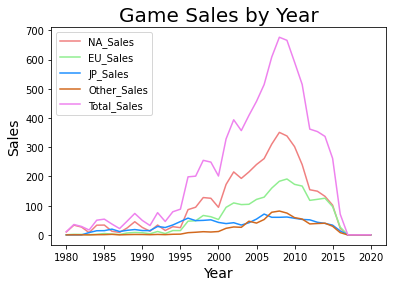

In [33]:
plt.plot(df_by_year.index, df_by_year['NA_Sales'], label='NA_Sales', color='lightcoral')
plt.plot(df_by_year.index, df_by_year['EU_Sales'], label='EU_Sales', color='lightgreen')
plt.plot(df_by_year.index, df_by_year['JP_Sales'], label='JP_Sales', color='dodgerblue')
plt.plot(df_by_year.index, df_by_year['Other_Sales'], label='Other_Sales', color='chocolate')
plt.plot(df_by_year.index, df_by_year['Total_Sales'], label='Total_Sales', color='violet')
plt.legend()
plt.title('Game Sales by Year', fontdict={'size':20})
plt.xlabel('Year', fontdict={'size':14})
plt.ylabel('Sales', fontdict={'size':14})
plt.show()

#### -> 연도별 게임 판매량은 2005년 ~ 2010년 사이에 최대치를 찍고 점점 하락하는 모습으로 보인다.

In [85]:
# 게임 장르, 연도별 게임 출고량
df_by_genre_and_year = df[['Year', 'Genre', 'Total_Sales']].groupby(['Genre', 'Year']).sum()
df_by_genre_and_year

Total_Sales
Genre    Year             
Action   1980         0.34
         1981        14.79
         1982         6.50
         1983         2.86
         1984         1.85
...                    ...
Strategy 2012         3.33
         2013         6.32
         2014         0.97
         2015         1.82
         2016         0.52

[388 rows x 1 columns]

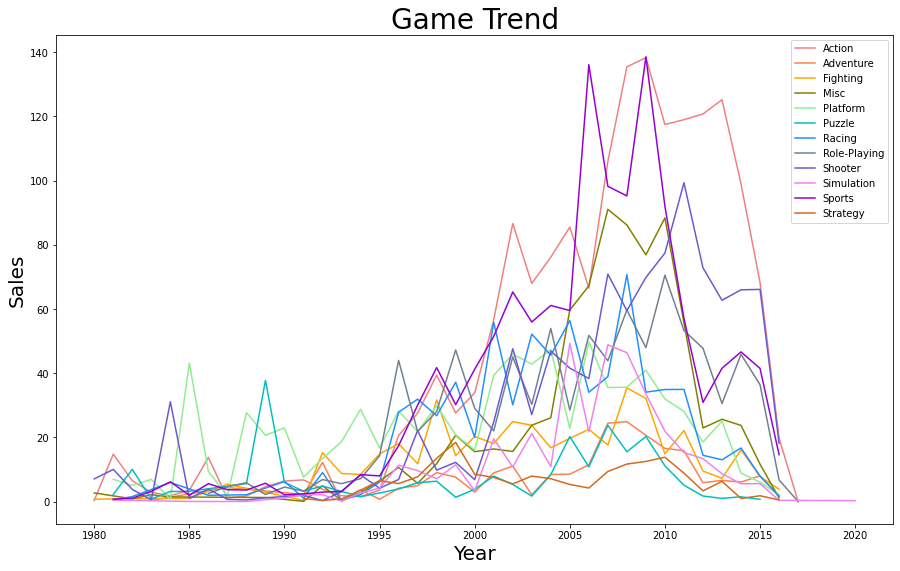

In [71]:
plt.figure(figsize=(15,9))

plt.plot(df_by_genre_and_year.xs('Action'), label='Action', color='lightcoral')
plt.plot(df_by_genre_and_year.xs('Adventure'), label='Adventure', color='coral')
plt.plot(df_by_genre_and_year.xs('Fighting'), label='Fighting', color='orange')
plt.plot(df_by_genre_and_year.xs('Misc'), label='Misc', color='olive')
plt.plot(df_by_genre_and_year.xs('Platform'), label='Platform', color='lightgreen')
plt.plot(df_by_genre_and_year.xs('Puzzle'), label='Puzzle', color='c')
plt.plot(df_by_genre_and_year.xs('Racing'), label='Racing', color='dodgerblue')
plt.plot(df_by_genre_and_year.xs('Role-Playing'), label='Role-Playing', color='slategray')
plt.plot(df_by_genre_and_year.xs('Shooter'), label='Shooter', color='slateblue')
plt.plot(df_by_genre_and_year.xs('Simulation'), label='Simulation', color='violet')
plt.plot(df_by_genre_and_year.xs('Sports'), label='Sports', color='darkviolet')
plt.plot(df_by_genre_and_year.xs('Strategy'), label='Strategy', color='chocolate')

plt.legend(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'])
plt.title('Game Trend', fontdict={'size':28})
plt.xlabel('Year', fontdict={'size':20})
plt.ylabel('Sales', fontdict={'size':20})
plt.show()

#### -> 그래프가 난잡해 시각적으로 구분하기 힘들다. 위의 연도별 출고량 그래프에 의하면 출고량이 늘어나기 시작한 특정 년도가 있기 때문에 그에 비례해 2005년 이후 장르별 출고량 또한 상승한 것을 볼 수 있다. 따라서 연도별 총매출에 대한 %를 나타내는 그래프를 시각화해보겠다.

In [133]:
# df에 새로운 column 'Percentage of Yearly Genre Sales' 추가
for i in range(16241):
  if df['Year'].iloc[i] == 1980:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[0]
  elif df['Year'].iloc[i] == 1981:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[1]
  elif df['Year'].iloc[i] == 1982:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[2]
  elif df['Year'].iloc[i] == 1983:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[3]
  elif df['Year'].iloc[i] == 1984:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[4]
  elif df['Year'].iloc[i] == 1985:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[5]
  elif df['Year'].iloc[i] == 1986:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[6]
  elif df['Year'].iloc[i] == 1987:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[7]
  elif df['Year'].iloc[i] == 1988:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[8]
  elif df['Year'].iloc[i] == 1989:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[9]
  elif df['Year'].iloc[i] == 1990:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[10]
  elif df['Year'].iloc[i] == 1991:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[11]
  elif df['Year'].iloc[i] == 1992:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[12]
  elif df['Year'].iloc[i] == 1993:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[13]
  elif df['Year'].iloc[i] == 1994:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[14]
  elif df['Year'].iloc[i] == 1995:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[15]
  elif df['Year'].iloc[i] == 1996:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[16]
  elif df['Year'].iloc[i] == 1997:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[17]
  elif df['Year'].iloc[i] == 1998:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[18]
  elif df['Year'].iloc[i] == 1999:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[19]
  elif df['Year'].iloc[i] == 2000:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[20]
  elif df['Year'].iloc[i] == 2001:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[21]
  elif df['Year'].iloc[i] == 2002:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[22]
  elif df['Year'].iloc[i] == 2003:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[23]
  elif df['Year'].iloc[i] == 2004:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[24]
  elif df['Year'].iloc[i] == 2005:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[25]
  elif df['Year'].iloc[i] == 2006:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[26]
  elif df['Year'].iloc[i] == 2007:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[27]
  elif df['Year'].iloc[i] == 2008:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[28]
  elif df['Year'].iloc[i] == 2009:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[29]
  elif df['Year'].iloc[i] == 2010:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[30]
  elif df['Year'].iloc[i] == 2011:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[31]
  elif df['Year'].iloc[i] == 2012:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[32]
  elif df['Year'].iloc[i] == 2013:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[33]
  elif df['Year'].iloc[i] == 2014:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[34]
  elif df['Year'].iloc[i] == 2015:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[35]
  elif df['Year'].iloc[i] == 2016:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[36]
  elif df['Year'].iloc[i] == 2017:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[37]
  elif df['Year'].iloc[i] == 2020:
    df['Percentage of Yearly Genre Sales'].iloc[i] = df['Total_Sales'].iloc[i] / df_by_year['Total_Sales'].iloc[38]
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Percentage of Yearly Genre Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.000059
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.000270
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.000034
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.000068
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.000423


In [134]:
df_percentage_of_yearly_sales = df[['Year', 'Genre', 'Percentage of Yearly Genre Sales']].groupby(['Genre', 'Year']).sum()
df_percentage_of_yearly_sales

Percentage of Yearly Genre Sales
Genre    Year                                  
Action   1980                          0.031250
         1981                          0.414518
         1982                          0.225069
         1983                          0.170238
         1984                          0.036743
...                                         ...
Strategy 2012                          0.009197
         2013                          0.017872
         2014                          0.002878
         2015                          0.006951
         2016                          0.007340

[388 rows x 1 columns]

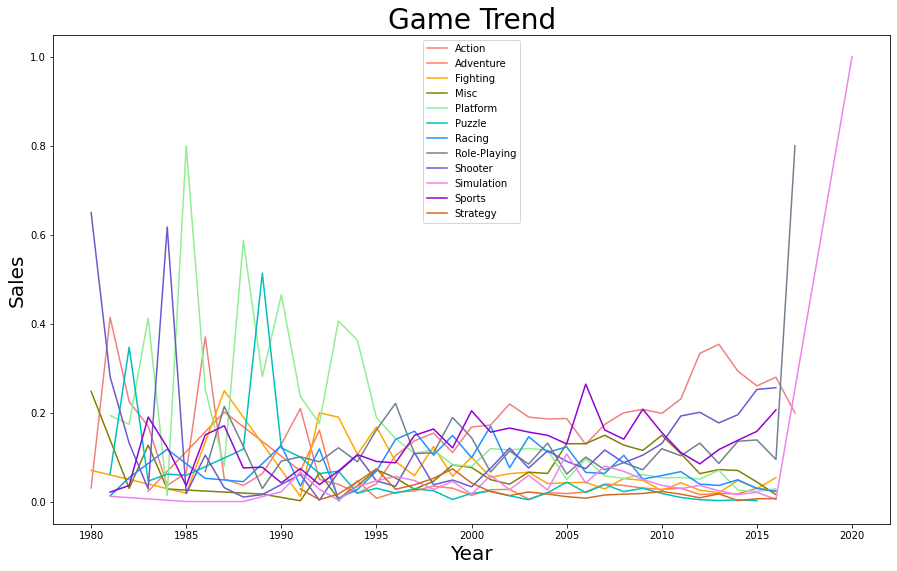

In [135]:
plt.figure(figsize=(15,9))

plt.plot(df_percentage_of_yearly_sales.xs('Action'), label='Action', color='lightcoral')
plt.plot(df_percentage_of_yearly_sales.xs('Adventure'), label='Adventure', color='coral')
plt.plot(df_percentage_of_yearly_sales.xs('Fighting'), label='Fighting', color='orange')
plt.plot(df_percentage_of_yearly_sales.xs('Misc'), label='Misc', color='olive')
plt.plot(df_percentage_of_yearly_sales.xs('Platform'), label='Platform', color='lightgreen')
plt.plot(df_percentage_of_yearly_sales.xs('Puzzle'), label='Puzzle', color='c')
plt.plot(df_percentage_of_yearly_sales.xs('Racing'), label='Racing', color='dodgerblue')
plt.plot(df_percentage_of_yearly_sales.xs('Role-Playing'), label='Role-Playing', color='slategray')
plt.plot(df_percentage_of_yearly_sales.xs('Shooter'), label='Shooter', color='slateblue')
plt.plot(df_percentage_of_yearly_sales.xs('Simulation'), label='Simulation', color='violet')
plt.plot(df_percentage_of_yearly_sales.xs('Sports'), label='Sports', color='darkviolet')
plt.plot(df_percentage_of_yearly_sales.xs('Strategy'), label='Strategy', color='chocolate')

plt.legend(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'])
plt.title('Game Trend', fontdict={'size':28})
plt.xlabel('Year', fontdict={'size':20})
plt.ylabel('Sales', fontdict={'size':20})
plt.show()

#### -> 2018년 이후로는 데이터가 매우 적기 때문에 %의 의미가 크게 줄어들었다. 따라서 2017년도 부터의 데이터는 무시하겠다.

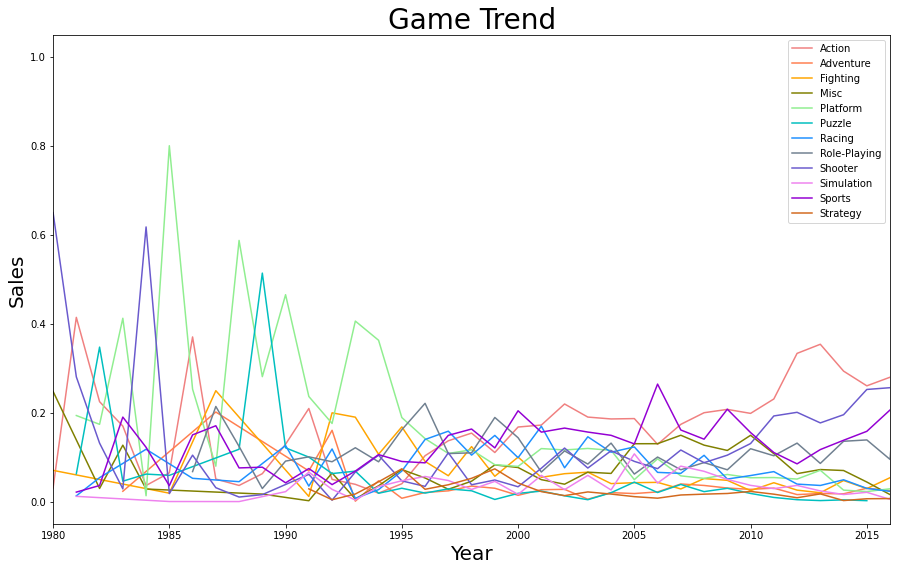

In [149]:
plt.figure(figsize=(15,9))

plt.plot(df_percentage_of_yearly_sales.xs('Action'), label='Action', color='lightcoral')
plt.plot(df_percentage_of_yearly_sales.xs('Adventure'), label='Adventure', color='coral')
plt.plot(df_percentage_of_yearly_sales.xs('Fighting'), label='Fighting', color='orange')
plt.plot(df_percentage_of_yearly_sales.xs('Misc'), label='Misc', color='olive')
plt.plot(df_percentage_of_yearly_sales.xs('Platform'), label='Platform', color='lightgreen')
plt.plot(df_percentage_of_yearly_sales.xs('Puzzle'), label='Puzzle', color='c')
plt.plot(df_percentage_of_yearly_sales.xs('Racing'), label='Racing', color='dodgerblue')
plt.plot(df_percentage_of_yearly_sales.xs('Role-Playing'), label='Role-Playing', color='slategray')
plt.plot(df_percentage_of_yearly_sales.xs('Shooter'), label='Shooter', color='slateblue')
plt.plot(df_percentage_of_yearly_sales.xs('Simulation'), label='Simulation', color='violet')
plt.plot(df_percentage_of_yearly_sales.xs('Sports'), label='Sports', color='darkviolet')
plt.plot(df_percentage_of_yearly_sales.xs('Strategy'), label='Strategy', color='chocolate')

plt.legend(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'])
plt.title('Game Trend', fontdict={'size':28})
plt.xlabel('Year', fontdict={'size':20})
plt.ylabel('Sales', fontdict={'size':20})
plt.xlim(1980, 2016)
plt.show()

#### -> 데이터의 수도 적고 출고량도 적은 2017년도 이후의 데이터를 무시한 위의 그래프로 보아 게임 트렌드는 존재하며 Action, Shooter, Sports 장르의 게임이 트렌드임을 알 수 있었다. 다만 Action과 Shooter 게임의 경우 지속적인 상승세를 보이는 반면에 Sports 게임은 상위권이긴 하지만 하락세를 보이는 것으로 추측된다.

# 4. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스?

In [162]:
# 전세계 Sales top10
total_sales = df[['Name', 'Total_Sales']].groupby('Name').sum().nlargest(10, 'Total_Sales')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


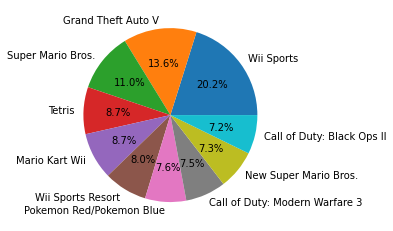

In [163]:
plt.pie(total_sales, labels=total_sales.index, autopct = '%.1f%%')
plt.show()

#### 전세계 출고량 top5는 
#### 1위 Wii Sports
#### 2위 Grand Theft Auto V
#### 3위 Super Mario Bros.
#### 공동 4위 Tetris, Mario Kart Wii
이다.

top5의 장르는 Sports, Action, 2 Platform, Puzzle 이며 플랫폼은 2 wii, PC, 2 GB이다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


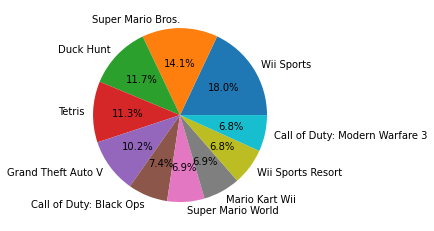

In [165]:
# 북아메리카 Sales top10
na_sales = df[['Name', 'NA_Sales']].groupby('Name').sum().nlargest(10, 'NA_Sales')

plt.pie(na_sales, labels=na_sales.index, autopct = '%.1f%%')
plt.show()

#### 북아메리카 지역의 출고량 top5는 
#### 1위 Wii Sports
#### 2위 Super Mario Bros.
#### 3위 Duck Hunt
#### 4위 Tetris
#### 5위 Grand Theft Auto V
이다.

top5의 장르는 Sports, Platform, Shooter, Puzzle, Action 이며 플랫폼은 Wii, 2 GB, Nes, PC이다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


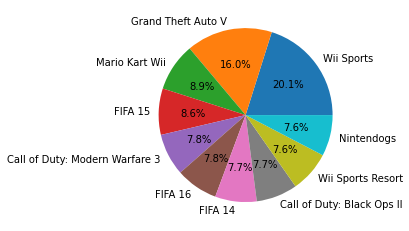

In [166]:
# 유럽 Sales top10
eu_sales = df[['Name', 'EU_Sales']].groupby('Name').sum().nlargest(10, 'EU_Sales')

plt.pie(eu_sales, labels=eu_sales.index, autopct = '%.1f%%')
plt.show()

#### 유럽 지역의 출고량 top5는 
#### 1위 Wii Sports
#### 2위 Grand Thwft Auto V
#### 3위 Mario Kart Wii
#### 4위 FIFA 15
#### 공동 5위 Call of Duty: Modern Warfare 3, FIFA 16
이다.

top5의 장르는 3 Sports, Action, Racing, Puzzle이며 플랫폼은 2 Wii, PC, 2 PS3, PS4이다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


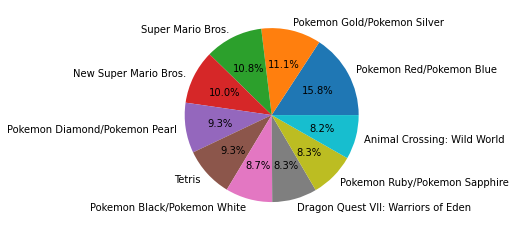

In [167]:
# 일본 Sales top10
jp_sales = df[['Name', 'JP_Sales']].groupby('Name').sum().nlargest(10, 'JP_Sales')

plt.pie(jp_sales, labels=jp_sales.index, autopct = '%.1f%%')
plt.show()

#### 일본 지역의 출고량 top5는 
#### 1위 Pokemon Red/Pokemon Blue
#### 2위 Pokemon Gold/Pokemon Silver
#### 3위 Super Mario Bros.
#### 4위 New Super Mario Bros.
#### 공동 5위 Pokemon Diamond/Pokemon Pearl, Tetris
이다.

top5의 장르는 3 Role-Playing, 2 Platform, Puzzle이며 플랫폼은 2 Wii, PC, 2 PS3, PS4이다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


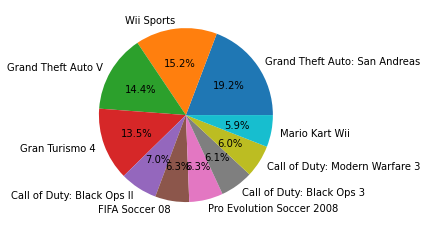

In [168]:
# 기타 Sales top10
ot_sales = df[['Name', 'Other_Sales']].groupby('Name').sum().nlargest(10, 'Other_Sales')

plt.pie(ot_sales, labels=ot_sales.index, autopct = '%.1f%%')
plt.show()

#### 기타 지역의 출고량 top5는 
#### 1위 Grand Theft Auto: San Andreas
#### 2위 Wii Sports
#### 3위 Grand Theft Auto V
#### 4위 Gran Turismo 4
#### 5위 Call of Duty: Black Ops ||
이다.

top5의 장르는 2 Action, Sports, Racing, Shooter이며 플랫폼은 2 PS2, Wii, PC, PS3이다.

# 5. Conclusion

다음 분기에 설계해야 하는 게임은 지역별로 약간씩 다를 것으로 보인다. 전세계적인 트렌트인 Action과 Shooter, Sports 게임 또한 고려하겠다.

북아메리카 지역 : 장르로는 Action, Shooter, Sports 순으로 고려해볼 수 있으며 플랫폼으로는 GB가 출고량이 높긴 하지만 GB는 지속적으로 감소하는 추세이므로 Wii 또는 Nes를 고려해볼 수 있다.

유럽 지역 : 장르로는 Sports, Action을 고려해볼 수 있으며 플랫폼으로는 Wii를 고려해볼 수 있다. 

일본 지역 : 장르로는 Role-Playing을 고려해볼 수 있으며 플랫폼으로는 Wii를 고려해볼 수 있다.

기타 지역 : 장르로는 Action, Shooter을 고려해볼 수 있으며 플랫폼으로는 Wii를 고려해볼 수 있다.